# Introduction to CNN and Computer Vision with Tensorflow

Computer Vision is the practice of writing algorithms which can discover patter s in virtual data, such as camera of a self-driving car recognizing the car in frot.


In [1]:
# gettindg the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-05-13 00:04:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.13.80, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   201MB/s    in 0.5s    

2021-05-13 00:04:52 (201 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
# Unzip
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

# 0. Visualizing Images

In [3]:
# getting class names
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
# create a list of class names
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]
print(class_names)


['pizza' 'steak']


In [4]:
# visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir+'/'+target_class

    # get random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # read image and plot
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}')

    return img

['2761427.jpg']
Image shape: (512, 512, 3)


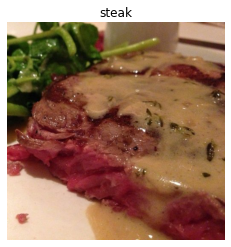

In [5]:
img = view_random_image('pizza_steak/train',
                        'steak')

In [6]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[242, 220, 196],
        [240, 218, 194],
        [241, 219, 195],
        ...,
        [161, 125, 113],
        [152, 115, 106],
        [143, 106,  97]],

       [[242, 220, 196],
        [241, 219, 195],
        [242, 220, 196],
        ...,
        [157, 119, 108],
        [150, 112, 101],
        [143, 105,  94]],

       [[244, 222, 198],
        [242, 220, 196],
        [242, 220, 196],
        ...,
        [156, 117, 102],
        [147, 109,  96],
        [139, 101,  88]],

       ...,

       [[249, 227, 203],
        [248, 224, 200],
        [247, 223, 199],
        ...,
        [108,  17,  26],
        [111,  20,  29],
        [115,  24,  31]],

       [[251, 229, 205],
        [250, 226, 202],
        [248, 224, 200],
        ...,
        [107,  14,  25],
        [108,  15,  25],
        [111,  18,  28]],

       [[250, 228, 204],
        [248, 224, 200],
        [246, 222, 198],
        ...,
        [106,  13,  2

In [7]:
# get all the pixel values between zero and one
img/255.

array([[[0.94901961, 0.8627451 , 0.76862745],
        [0.94117647, 0.85490196, 0.76078431],
        [0.94509804, 0.85882353, 0.76470588],
        ...,
        [0.63137255, 0.49019608, 0.44313725],
        [0.59607843, 0.45098039, 0.41568627],
        [0.56078431, 0.41568627, 0.38039216]],

       [[0.94901961, 0.8627451 , 0.76862745],
        [0.94509804, 0.85882353, 0.76470588],
        [0.94901961, 0.8627451 , 0.76862745],
        ...,
        [0.61568627, 0.46666667, 0.42352941],
        [0.58823529, 0.43921569, 0.39607843],
        [0.56078431, 0.41176471, 0.36862745]],

       [[0.95686275, 0.87058824, 0.77647059],
        [0.94901961, 0.8627451 , 0.76862745],
        [0.94901961, 0.8627451 , 0.76862745],
        ...,
        [0.61176471, 0.45882353, 0.4       ],
        [0.57647059, 0.42745098, 0.37647059],
        [0.54509804, 0.39607843, 0.34509804]],

       ...,

       [[0.97647059, 0.89019608, 0.79607843],
        [0.97254902, 0.87843137, 0.78431373],
        [0.96862745, 0

# 1. Building and end-to-end CNN Model

What we have to do:

1. Load our images
2. Preprocess our images
3. Build a CNN to find patterns in them
4. Compile our CNN
5. Fit the CNN to our training data

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all values  btw 0 and 1)

train_datagen = ImageDataGenerator(rescale =1./255) # generates batches of tensor image data with real-time data augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data dirs
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size=32,
                                              target_size=(244,244),
                                              class_mode='binary',
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size=32,
                                              target_size=(244,244),
                                              class_mode='binary',
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
# build CNN model - tiny VGG
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation='relu',
                                                             input_shape=(244,244,3)),
                                      tf.keras.layers.Conv2D(10,3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                         padding='valid'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding='valid'),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
                                      
                                      
])

In [10]:
# compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [11]:
# fitting the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 43s 221ms/step - loss: 0.5882 - accuracy: 0.6755 - val_loss: 0.4263 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4479 - accuracy: 0.8000 - val_loss: 0.3187 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4025 - accuracy: 0.8282 - val_loss: 0.3500 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3669 - accuracy: 0.8298 - val_loss: 0.4181 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3718 - accuracy: 0.8364 - val_loss: 0.3060 - val_accuracy: 0.8680
